In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ds = pd.read_csv("dataset.csv")

ds = ds[ds["target"] != 0]

ds["date"] = pd.to_datetime(ds["date"])
dates = ds["date"]

date_2_3 = dates.mean() + 2 / 3 * dates.std()
date_2_3, dates.max(), dates.min(), dates.mean(), dates.std()

(Timestamp('2013-02-24 14:21:30.714119313'),
 Timestamp('2013-05-19 00:00:00'),
 Timestamp('2012-08-18 00:00:00'),
 Timestamp('2013-01-02 12:07:47.759788544'),
 Timedelta('79 days 15:20:34.431496154'))

In [5]:
from tqdm import tqdm

In [8]:
ds.columns  # Index(['player_1', 'pases/90_1', 'shots/90_1', 'losses/90_1', 'gains/90_1',
#       'minutes_1', 'player_2', 'pases/90_2', 'shots/90_2', 'losses/90_2',
#       'gains/90_2', 'minutes_2', 'partido_id', 'target', 'date'],
#      dtype='object')

# recomendation_matrix is a matrix of:
#   columns of player_1 and player_2
#   rows of player_1 and player_2
#   values are the average target between the two players

players_1 = ds["player_1"].unique()
players_2 = ds["player_2"].unique()

recomendation_matrix = np.zeros((len(players_1), len(players_2)))

recomendation_matrix.shape

(520, 519)

In [9]:
import itertools

In [10]:
for (i, player_1), (j, player_2) in tqdm(itertools.product(enumerate(players_1), enumerate(players_2))):
    mask = (ds["player_1"] == player_1) & (ds["player_2"] == player_2)
    mask |= (ds["player_1"] == player_2) & (ds["player_2"] == player_1)
    recomendation_matrix[i, j] = ds[mask]["target"].mean()

recomendation_matrix

269880it [02:11, 2058.19it/s]


array([[0.12173737, 0.0549324 , 0.04714366, ...,        nan,        nan,
               nan],
       [       nan, 0.05570178, 0.08549352, ...,        nan,        nan,
               nan],
       [0.05570178,        nan, 0.0407706 , ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.01075076],
       [       nan,        nan,        nan, ...,        nan, 0.01075076,
               nan]])

In [12]:
recomendation_matrix_df = pd.DataFrame(recomendation_matrix, index=players_1, columns=players_2)
recomendation_matrix_df

,19524.0,15943.0,20467.0,80254.0,8758.0,42427.0,43274.0,28566.0,17733.0,17127.0,...,60232.0,43901.0,114312.0,112516.0,94147.0,103912.0,92790.0,94738.0,76227.0,106458.0
17733.0,0.121737,0.054932,0.047144,0.015092,0.071962,0.108667,0.030980,0.078663,NaN,0.027134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19524.0,NaN,0.055702,0.085494,0.101098,0.155933,0.102294,0.078967,0.142606,0.121737,0.041772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15943.0,0.055702,NaN,0.040771,0.070384,0.088185,0.100020,0.033152,0.047830,0.054932,0.108578,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20467.0,0.085494,0.040771,NaN,0.099391,0.062051,0.079398,0.045464,0.064188,0.047144,0.027311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80254.0,0.101098,0.070384,0.099391,NaN,0.129323,0.049372,0.063222,0.137978,0.015092,0.099489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.044377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010751


In [27]:
ratings = recomendation_matrix_df.fillna(0).values

In [21]:
matrix_size = np.prod(ratings.shape)
interaction = np.flatnonzero(ratings).shape[0]
sparsity = 100 * (interaction / matrix_size)

print("dimension: ", ratings.shape)
print("sparsity: {:.1f}%".format(sparsity))

dimension:  (520, 519)
sparsity: 3.9%


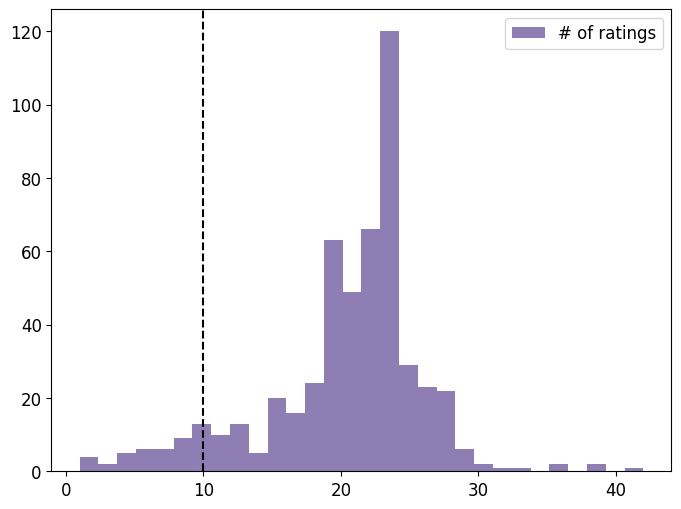

In [23]:
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"] = 12

plt.hist(
    np.sum(ratings != 0, axis=1),
    histtype="stepfilled",
    bins=30,
    alpha=0.85,
    label="# of ratings",
    color="#7A68A6",
    # normed=True,
)
plt.axvline(x=10, color="black", linestyle="--")
plt.legend(loc="upper right")
plt.show()

In [24]:
# ALS (Alternating Least Squares)


class ExplicitMF:
    """
    Train a matrix factorization model using Alternating Least Squares
    to predict empty entries in a matrix

    Parameters
    ----------
    n_iters : int
        number of iterations to train the algorithm

    n_factors : int
        number of latent factors to use in matrix
        factorization model, some machine-learning libraries
        denote this as rank

    reg : float
        regularization term for item/user latent factors,
        since lambda is a keyword in python we use reg instead
    """

    def __init__(self, n_iters, n_factors, reg):
        self.reg = reg
        self.n_iters = n_iters
        self.n_factors = n_factors

    def fit(self, train, test):
        """
        pass in training and testing at the same time to record
        model convergence, assuming both dataset is in the form
        of User x Item matrix with cells as ratings
        """
        self.n_user, self.n_item = train.shape
        self.user_factors = np.random.random((self.n_user, self.n_factors))
        self.item_factors = np.random.random((self.n_item, self.n_factors))

        # record the training and testing mse for every iteration
        # to show convergence later (usually, not worth it for production)
        self.test_mse_record = []
        self.train_mse_record = []
        for _ in range(self.n_iters):
            self.user_factors = self._als_step(
                train, self.user_factors, self.item_factors
            )
            self.item_factors = self._als_step(
                train.T, self.item_factors, self.user_factors
            )
            predictions = self.predict()
            test_mse = self.compute_mse(test, predictions)
            train_mse = self.compute_mse(train, predictions)
            self.test_mse_record.append(test_mse)
            self.train_mse_record.append(train_mse)

        return self

    def _als_step(self, ratings, solve_vecs, fixed_vecs):
        """
        when updating the user matrix,
        the item matrix is the fixed vector and vice versa
        """
        A = fixed_vecs.T.dot(fixed_vecs) + np.eye(self.n_factors) * self.reg
        b = ratings.dot(fixed_vecs)
        A_inv = np.linalg.inv(A)
        solve_vecs = b.dot(A_inv)
        return solve_vecs

    def predict(self):
        """predict ratings for every user and item"""
        pred = self.user_factors.dot(self.item_factors.T)
        return pred

    @staticmethod
    def compute_mse(y_true, y_pred):
        """ignore zero terms prior to comparing the mse"""
        mask = np.nonzero(y_true)
        mse = mean_squared_error(y_true[mask], y_pred[mask])
        return mse


def plot_learning_curve(model):
    """visualize the training/testing loss"""
    linewidth = 3
    plt.plot(model.test_mse_record, label="Test", linewidth=linewidth)
    plt.plot(model.train_mse_record, label="Train", linewidth=linewidth)
    plt.xlabel("iterations")
    plt.ylabel("MSE")
    plt.legend(loc="best")

In [28]:
def create_train_test(ratings):
    """
    split into training and test sets,
    remove 10 ratings from each user
    and assign them to the test set
    """
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        non_zero_indices = np.flatnonzero(ratings[user])
        if len(non_zero_indices) < 10:
            test_index = np.random.choice(
                non_zero_indices, size=len(non_zero_indices), replace=False
            )
        else:
            test_index = np.random.choice(non_zero_indices, size=10, replace=False)

        train[user, test_index] = 0.0
        test[user, test_index] = ratings[user, test_index]

    # assert that training and testing set are truly disjoint
    assert np.all(train * test == 0)
    return train, test


# Ejemplo de uso
train, test = create_train_test(ratings)

train.shape, test.shape

((520, 519), (520, 519))

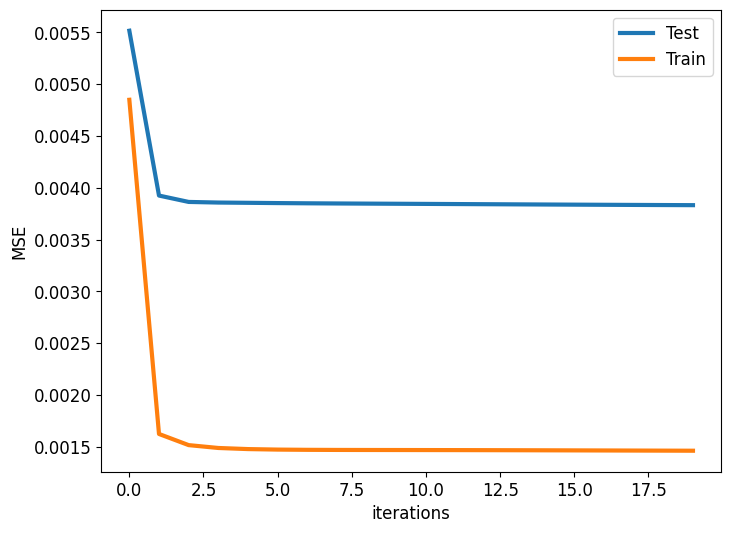

In [31]:
als = ExplicitMF(n_iters=20, n_factors=40, reg=0.01)
als.fit(train, test)
plot_learning_curve(als)